In [1]:
import random
import pandas as pd
import numpy as np
import sklearn.metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import *
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("Libraries imported.")

Libraries imported.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

%cd /content/drive/My\ Drive/ML_HOMEWORK\ 1/
%ls


/content/drive/My Drive/ML_HOMEWORK 1
 blind_test.csv                  mapping_traces_O0.csv      prova.gdoc
 Machine-Learning-2021-2022/     mapping_traces_O0.gsheet   prova.txt
'mapping_traces_O0 (1).gsheet'   prova.csv


In [4]:

filename1 = '/content/drive/My Drive/ML_HOMEWORK 1/blind_test.csv'
blind_test = pd.read_csv(filename1, sep='\t')
array= list(blind_test)
print(array)
print('File loaded: %d samples.' %(len(blind_test.instructions)))






['instructions', 'source_line', 'line_number', 'function_name', 'program']
File loaded: 10000 samples.


In [5]:

filename = '/content/drive/My Drive/ML_HOMEWORK 1/mapping_traces_O0.csv'

public_dataset = pd.read_csv(filename, sep='\t')
array=[]
i=0
for i in range(100000) :
  array.append(public_dataset.iloc[i, 0]+public_dataset.iloc[i, 1])

arr = np.array(array)
print(arr[0])
class_names =  np.array([str(c) for c in public_dataset.bug])


movl HIGHVAL l 19 1 int32t  l  19 1  = ( -8 ) ;


In [ ]:

#FIRST COMMAND
arr.sort()

index=[]
for i in range(100000):
  if (i+1 < 100000):
    if arr[i].split(' ')[0] != arr[i+1].split(' ')[0]:
      index.append(i)
index.append(100000)
print(index)


['cmpb', '0', 'MEM', 'je', 'MEM', '(', '(', '', 'g', '', '81', '', '=', '=', '&', '', 'g', '', '82', '', '|', '|', '', 'g', '', '81', '', '=', '=', '0', ')', '?', '(', 'void', ')', '(', '0', ')', ':', '', '', '', 'assert', '', 'fail', '', '(', '"', '', 'g', '', '81', '', '=', '=', '&', '', 'g', '', '82', '', '|', '|', '', 'g', '', '81', '', '=', '=', '0', '"', ',', '"', '/', 'mnt', '/', '', 'v', '30', '', '/', '', 'data', '', 'source', '', 'asm', '', 'trace', '', 'train', '', 'o', '0', '', 'p', '3', '', '/', 'train', '/', '', 'process', '', '5', '', '/', '', 'RUN', '', '98', '', '/', 'a', '.', 'c', '"', ',', '396', ',', '', '', '', 'extension', '', '', '', '', '', '', 'func', '', '', '', ')', ')', ';'] 1
['cmpb', '0', 'MEM', 'je', 'MEM', '(', '(', '', 'l', '', '18', '13', '', '=', '=', '&', '', 'g', '', '46', '3', '', '|', '|', '', 'l', '', '18', '13', '', '=', '=', '&', '', 'l', '', '17', '40', '', ')', '?', '(', 'void', ')', '(', '0', ')', ':', '', '', '', 'assert', '', 'fail', '', '

In [ ]:
id = random.randrange(0,len(public_dataset.instructions))
print('%d - %s -- %s -- %s' %(id,public_dataset.instructions[id],public_dataset.source_line[id],public_dataset.bug[id]))

36168 - movw MEM %ax addw -1 %ax movw %ax MEM  -- int32t *  l  64 2  = &  g  11 5  ; -- 1


In [6]:

vectorizer = TfidfVectorizer( min_df = 5)
X = vectorizer.fit_transform(arr)
print(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))
vocab=vectorizer.vocabulary_
X_all=X
y_all=public_dataset.bug
BlindVect=TfidfVectorizer(vocabulary=vocab).fit_transform(blind_test.instructions+blind_test.source_line)



{'movl': 438, 'highval': 394, '19': 110, 'int32t': 399, '82': 326, '25': 176, '73': 309, 'movq': 439, '15': 66, '07': 7, 'rcx': 459, '06': 6, 'rax': 457, 'mem': 416, 'movabsq': 436, 'cmpq': 373, 'je': 405, 'leaq': 413, '66': 297, 'jne': 411, 'jmp': 410, '14': 55, 'void': 562, 'assert': 366, 'fail': 390, 'mnt': 434, '30': 203, 'data': 378, 'source': 550, 'asm': 365, 'trace': 555, 'train': 556, 'process': 452, '33': 215, 'run': 483, '22': 143, 'extension': 389, 'func': 392, 'movw': 446, '41': 244, '89': 338, 'int16t': 398, 'eax': 384, '39': 238, '13': 44, '94': 346, '70': 303, 'rdi': 460, 'rsi': 481, '240': 166, 'edx': 387, 'callq': 368, 'memcpy': 418, 'uint32t': 559, '43': 249, '90': 340, '48': 260, '17': 88, '10': 10, 'uint16t': 558, '54': 274, '45': 254, 'for': 391, '20': 121, 'safe': 484, 'add': 357, 'int': 397, '16': 77, '91': 342, '23': 154, '42': 247, 'rshift': 480, 'uint': 557, '195': 116, '36': 226, 'lshift': 415, 'sub': 552, '32': 211, 'mod': 435, '51': 268, '50': 266, '55': 27


Support Vector Machine


In [7]:
#Support Vector Machines

model=svm.SVC(kernel="poly", verbose=1)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.333, random_state=117)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy=model.score(X_test, y_test)
print("accuracy %.3f" %accuracy)
print(classification_report(y_test, y_pred))


[LibSVM]accuracy 0.940
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     16725
           1       0.98      0.90      0.94     16575

    accuracy                           0.94     33300
   macro avg       0.94      0.94      0.94     33300
weighted avg       0.94      0.94      0.94     33300



Logistic regression


In [7]:
model = LogisticRegression(random_state=0,max_iter=10000, verbose=1)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.333, random_state=117)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy=model.score(X_test, y_test)
print("accuracy %.3f" %accuracy)
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy 0.790
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     16725
           1       0.81      0.76      0.78     16575

    accuracy                           0.79     33300
   macro avg       0.79      0.79      0.79     33300
weighted avg       0.79      0.79      0.79     33300



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


Random Forest

In [22]:
model = RandomForestClassifier(n_estimators=150, max_depth=100, random_state=0, verbose=2)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.333, random_state=117)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy=model.score(X_test, y_test)
print("accuracy %.3f" %accuracy)
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 150


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


accuracy 0.952
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     16725
           1       0.97      0.93      0.95     16575

    accuracy                           0.95     33300
   macro avg       0.95      0.95      0.95     33300
weighted avg       0.95      0.95      0.95     33300



[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.8s finished


Decision tree

accuracy 0.917
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     16725
           1       0.93      0.90      0.91     16575

    accuracy                           0.92     33300
   macro avg       0.92      0.92      0.92     33300
weighted avg       0.92      0.92      0.92     33300



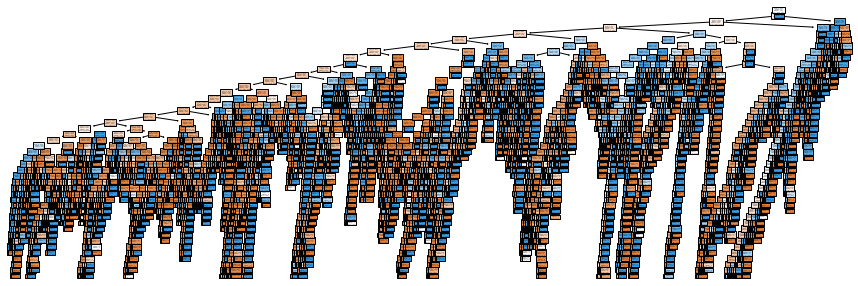

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.333, random_state=117)
model=DecisionTreeClassifier( max_depth=45, random_state=0, splitter="random", min_samples_split=5)
model.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(15, 5))
tree.plot_tree(model, filled=True,ax=ax) 
y_pred=model.predict(X_test)
accuracy=model.score(X_test, y_test)
print("accuracy %.3f" %accuracy)
print(classification_report(y_test, y_pred))

Fit model


Confusion matrix


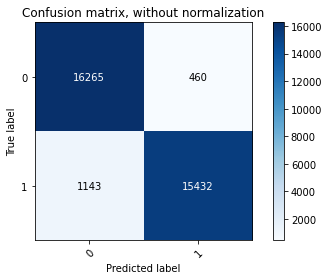

In [38]:
cm=confusion_matrix(y_test, y_pred , labels=None , sample_weight=None)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)
plt.show()
